## PCA on nutrition data following: https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

In [2]:
diet_df = pd.read_csv("../data/nhne/diet.csv")

In [3]:
# intake of nutrients for patient (SEQN) on the first day of the questionare.
diet_cols = ['SEQN', 'DR1TKCAL', 'DR1TPROT', 'DR1TCARB', 'DR1TSUGR', 'DR1TFIBE', 'DR1TTFAT', 'DR1TSFAT', 'DR1TMFAT', 'DR1TPFAT', 'DR1TCHOL', 'DR1TATOC', 'DR1TATOA', 'DR1TRET', 'DR1TVARA', 'DR1TACAR', 'DR1TBCAR', 'DR1TCRYP', 'DR1TLYCO', 'DR1TLZ', 'DR1TVB1', 'DR1TVB2', 'DR1TNIAC', 'DR1TVB6', 'DR1TFOLA', 'DR1TFA', 'DR1TFF', 'DR1TFDFE', 'DR1TCHL', 'DR1TVB12', 'DR1TB12A', 'DR1TVC', 'DR1TVD', 'DR1TVK', 'DR1TCALC', 'DR1TPHOS', 'DR1TMAGN', 'DR1TIRON', 'DR1TZINC', 'DR1TCOPP', 'DR1TSODI', 'DR1TPOTA', 'DR1TSELE', 'DR1TCAFF', 'DR1TTHEO', 'DR1TALCO', 'DR1TMOIS']
diet_df = diet_df[diet_cols].dropna()

In [53]:
exam_df = pd.read_csv("../data/nhne/examination.csv")

In [54]:
exam_cols = ['SEQN', 'BPXSY1', 'BPXSY2', 'BPXSY3', 'BMXBMI']
# exam_cols = ['SEQN', 'BPXSY1', 'BMXBMI']
exam_df= exam_df[exam_cols].dropna()

In [69]:
def pca_analysis(df, with_vis=True, title = "2 component pca"):
    # Separating out the features
    x = df.loc[:].values
    # Standardizing the features
    x = StandardScaler().fit_transform(x)
    
    # get principal components
    pca = PCA(n_components=2)
    p_comps = pca.fit_transform(x)
    p_df = pd.DataFrame(data=p_comps, columns=["comp1", "comp2"])
    explained_var_ratio = pca.explained_variance_ratio_
    
    if with_vis:
        fig = plt.figure(figsize = (8,8))
        ax = fig.add_subplot(1,1,1) 
        ax.set_xlabel('Principal Component 1', fontsize = 15)
        ax.set_ylabel('Principal Component 2', fontsize = 15)
        ax.set_title(title, fontsize = 20)
        ax.scatter(
            p_df.loc[:, "comp1"],
            p_df.loc[:, "comp2"],
            s = 10,
        )
        ax.grid()
    return x, p_df, explained_var_ratio

def pca_analysis_labels(df, targets, with_vis=True, title="pca analysis"):
    # Separating out the features
    x = df.loc[:].values
    # Standardizing the features
    x = StandardScaler().fit_transform(x)
    y = targets.loc[:, ["BMXBMI"]].values
    # get principal components
    pca = PCA(n_components=2)
    p_comps = pca.fit_transform(x)
    p_df = pd.DataFrame(data=p_comps, columns=["comp1", "comp2"])
    explained_var_ratio = pca.explained_variance_ratio_
    
    final_df = pd.concat([p_df, targets[["BMXBMI"]]], axis=1)
    final_df = final_df.dropna().reset_index()
    if with_vis:
        targets = ["under", "normal", "over"]
        target_values = [0.0, 1.0, 2.0]
        colors = ["r", "g", "b"]
        
        fig = plt.figure(figsize = (8,8))
        ax = fig.add_subplot(1,1,1) 
        ax.set_xlabel('Principal Component 1', fontsize = 15)
        ax.set_ylabel('Principal Component 2', fontsize = 15)
        ax.set_title(title, fontsize = 20)
        comp1 = final_df["comp1"].values
        comp2 = final_df["comp2"].values
        for target, color in zip(target_values, colors):
            indicesToKeep = final_df[["BMXBMI"]] == target
            indicesToKeep = np.where(indicesToKeep.values == True)
            ax.scatter(
                comp1[indicesToKeep[0]],
                comp2[indicesToKeep[0]],
                s = 10,
                c = color,
            )
            ax.legend(targets)
        ax.grid()
    return x, p_df, explained_var_ratio

def scree_plot(df, title):
     # Separating out the features
    x = df.loc[:].values
    # Standardizing the features
    x = StandardScaler().fit_transform(x)
    
    # get principal components
    pca = PCA()
    p_comps = pca.fit_transform(x)
    explained_var_ratio = pca.explained_variance_ratio_
    explained_var_ratio = [sum(explained_var_ratio[:i]) for i in range(len(explained_var_ratio))]
    
    plt.title(title)
    plt.plot(np.arange(len(explained_var_ratio)) + 1, explained_var_ratio)
    plt.show()
    return explained_var_ratio
    

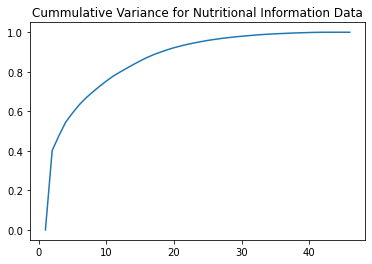

In [70]:
e = scree_plot(diet_df.drop(columns=["SEQN"]), title="Cummulative Variance for Nutritional Information Data")

In [71]:
for i in range(len(e)):
    if sum(e[:i]) >= 0.99:
        print(i + 1)
        break
len(e)

5


46

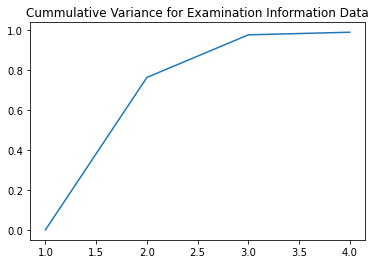

,BPXSY1,BPXSY2,BPXSY3,BMXBMI
0,122.0,114.0,102.0,26.7
1,156.0,160.0,156.0,28.6
2,140.0,140.0,146.0,28.9
3,108.0,102.0,104.0,17.1
4,136.0,134.0,142.0,19.7
...,...,...,...,...
9802,108.0,112.0,108.0,25.6
9805,164.0,168.0,168.0,24.9
9808,110.0,116.0,112.0,24.5
9810,136.0,130.0,138.0,34.0


In [73]:
scree_plot(exam_df.drop(columns=["SEQN"]), title="Cummulative Variance for Examination Information Data")
exam_df.drop(columns=["SEQN"])

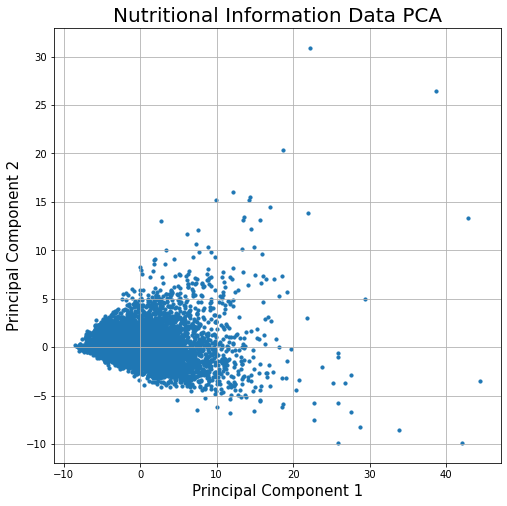

In [58]:
scaled_x, p_df, var_ratio = pca_analysis(diet_df.drop(columns=["SEQN"]), title = "Nutritional Information Data PCA")

In [59]:
var_ratio

array([0.40167603, 0.07518599])

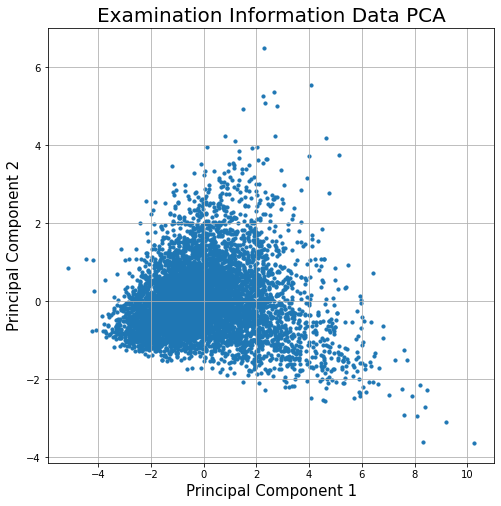

In [60]:
_, __, ___= pca_analysis(exam_df.drop(columns=["SEQN"]), title ="Examination Information Data PCA")

In [20]:
___

array([0.6509171, 0.3490829])

In [21]:
# exam_df.loc[((exam_df.BMXBMI > 24.9) & (exam_df.BMXBMI < 18.5)), "BMXBMI"]
labels = exam_df.copy()
labels.loc[(labels.BMXBMI < 18.5), "BMXBMI"] = 0
labels.loc[(labels.BMXBMI > 24.9), "BMXBMI"] = 2
labels.loc[(labels.BMXBMI > 3), "BMXBMI"] = 1

In [22]:
labels

,SEQN,BPXSY1,BMXBMI
0,73557,122.0,2.0
1,73558,156.0,2.0
2,73559,140.0,2.0
3,73560,108.0,0.0
4,73561,136.0,1.0
...,...,...,...
9802,83721,108.0,2.0
9805,83724,164.0,1.0
9808,83727,110.0,1.0
9810,83729,136.0,2.0


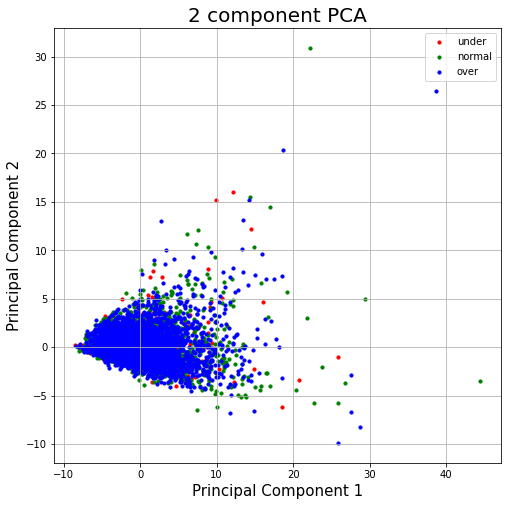

In [23]:
_, __, ___= pca_analysis_labels(diet_df.drop(columns=["SEQN"]), labels)
    

## Fitting a linear regression

In [15]:
from sklearn.linear_model import LinearRegression


In [16]:
full_df = diet_df.merge(labels, on=["SEQN"])

In [21]:
x = full_df.drop(columns=["BMXBMI", "SEQN"]).loc[:].values
y = full_df.loc[:, ["BMXBMI"]].values
lin = LinearRegression().fit(x, y)

In [22]:
mask = np.random.rand(len(full_df)) < 0.8
train = full_df[mask]
test = full_df[~mask]

In [23]:
train_x = train.drop(columns=["BMXBMI", "SEQN"]).loc[:].values
test_x = test.drop(columns=["BMXBMI", "SEQN"]).loc[:].values

train_y = train.loc[:, ["BMXBMI"]].values
test_y = test.loc[:, ["BMXBMI"]].values


In [24]:
oi = LinearRegression().fit(train_x, train_y)

In [26]:
preds = oi.predict(test_x)

In [29]:
from sklearn.metrics import mean_squared_error as mse
mse(preds, test_y)

0.3449168416038705

In [36]:
correct = preds.round() == test_y.astype(int)

In [37]:
correct.mean()

0.582392776523702